In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
timestr = time.strftime("%Y%m%d-%H%M%S")

plt.rcParams.update(plt.rcParamsDefault)


plt.rcParams.update({'font.size': 30})
plt.rc('xtick', labelsize=30) 

# plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

import time

timestr = time.strftime("%Y%m%d-%H%M%S")

In [50]:
Mapping = ['None','Orthographic','Twilight','Stereographic','Stereographic','Gnomonic','Gnomonic']

M = [1,2500,800,2000,1,2000,1]


avg_losses_all = []
std_losses_all = []

avg_losses_all_eqv = []
std_losses_all_eqv = []

for i in range(len(Mapping)):
    
    if Mapping[i]=='None':
        losses = np.loadtxt(f'Data/train_acc/Plot/loss_non-eqv_StndAmp.txt') # had 20 reps for both
        losses_eqv = np.loadtxt(f'Data/train_acc/Plot/loss_eqv_StndAmp.txt')

    else:
        losses = np.loadtxt(f'Data/train_acc/Plot/losscross_entropy_{Mapping[i]}_data_N8_its200_M{M[i]}_size200_split0.3_reps10.txt')
        losses_eqv = np.loadtxt(f'Data/train_acc/Plot/losscross_entropy_Eqv_{Mapping[i]}_data_N8_its200_M{M[i]}_size200_split0.3_reps10.txt')

    # Compute average across the lists (mean)
    average_list = np.mean(losses, axis=0)

    avg_losses_all.append(average_list)
    
    # Compute standard deviation across the lists
    std_deviation_list = np.std(losses, axis=0)

    std_losses_all.append(std_deviation_list)
    
    # Compute average across the lists (mean)
    average_list_eqv = np.mean(losses_eqv, axis=0)

    avg_losses_all_eqv.append(average_list_eqv)
    
    # Compute standard deviation across the lists
    std_deviation_list_eqv = np.std(losses_eqv, axis=0)

    std_losses_all_eqv.append(std_deviation_list_eqv)

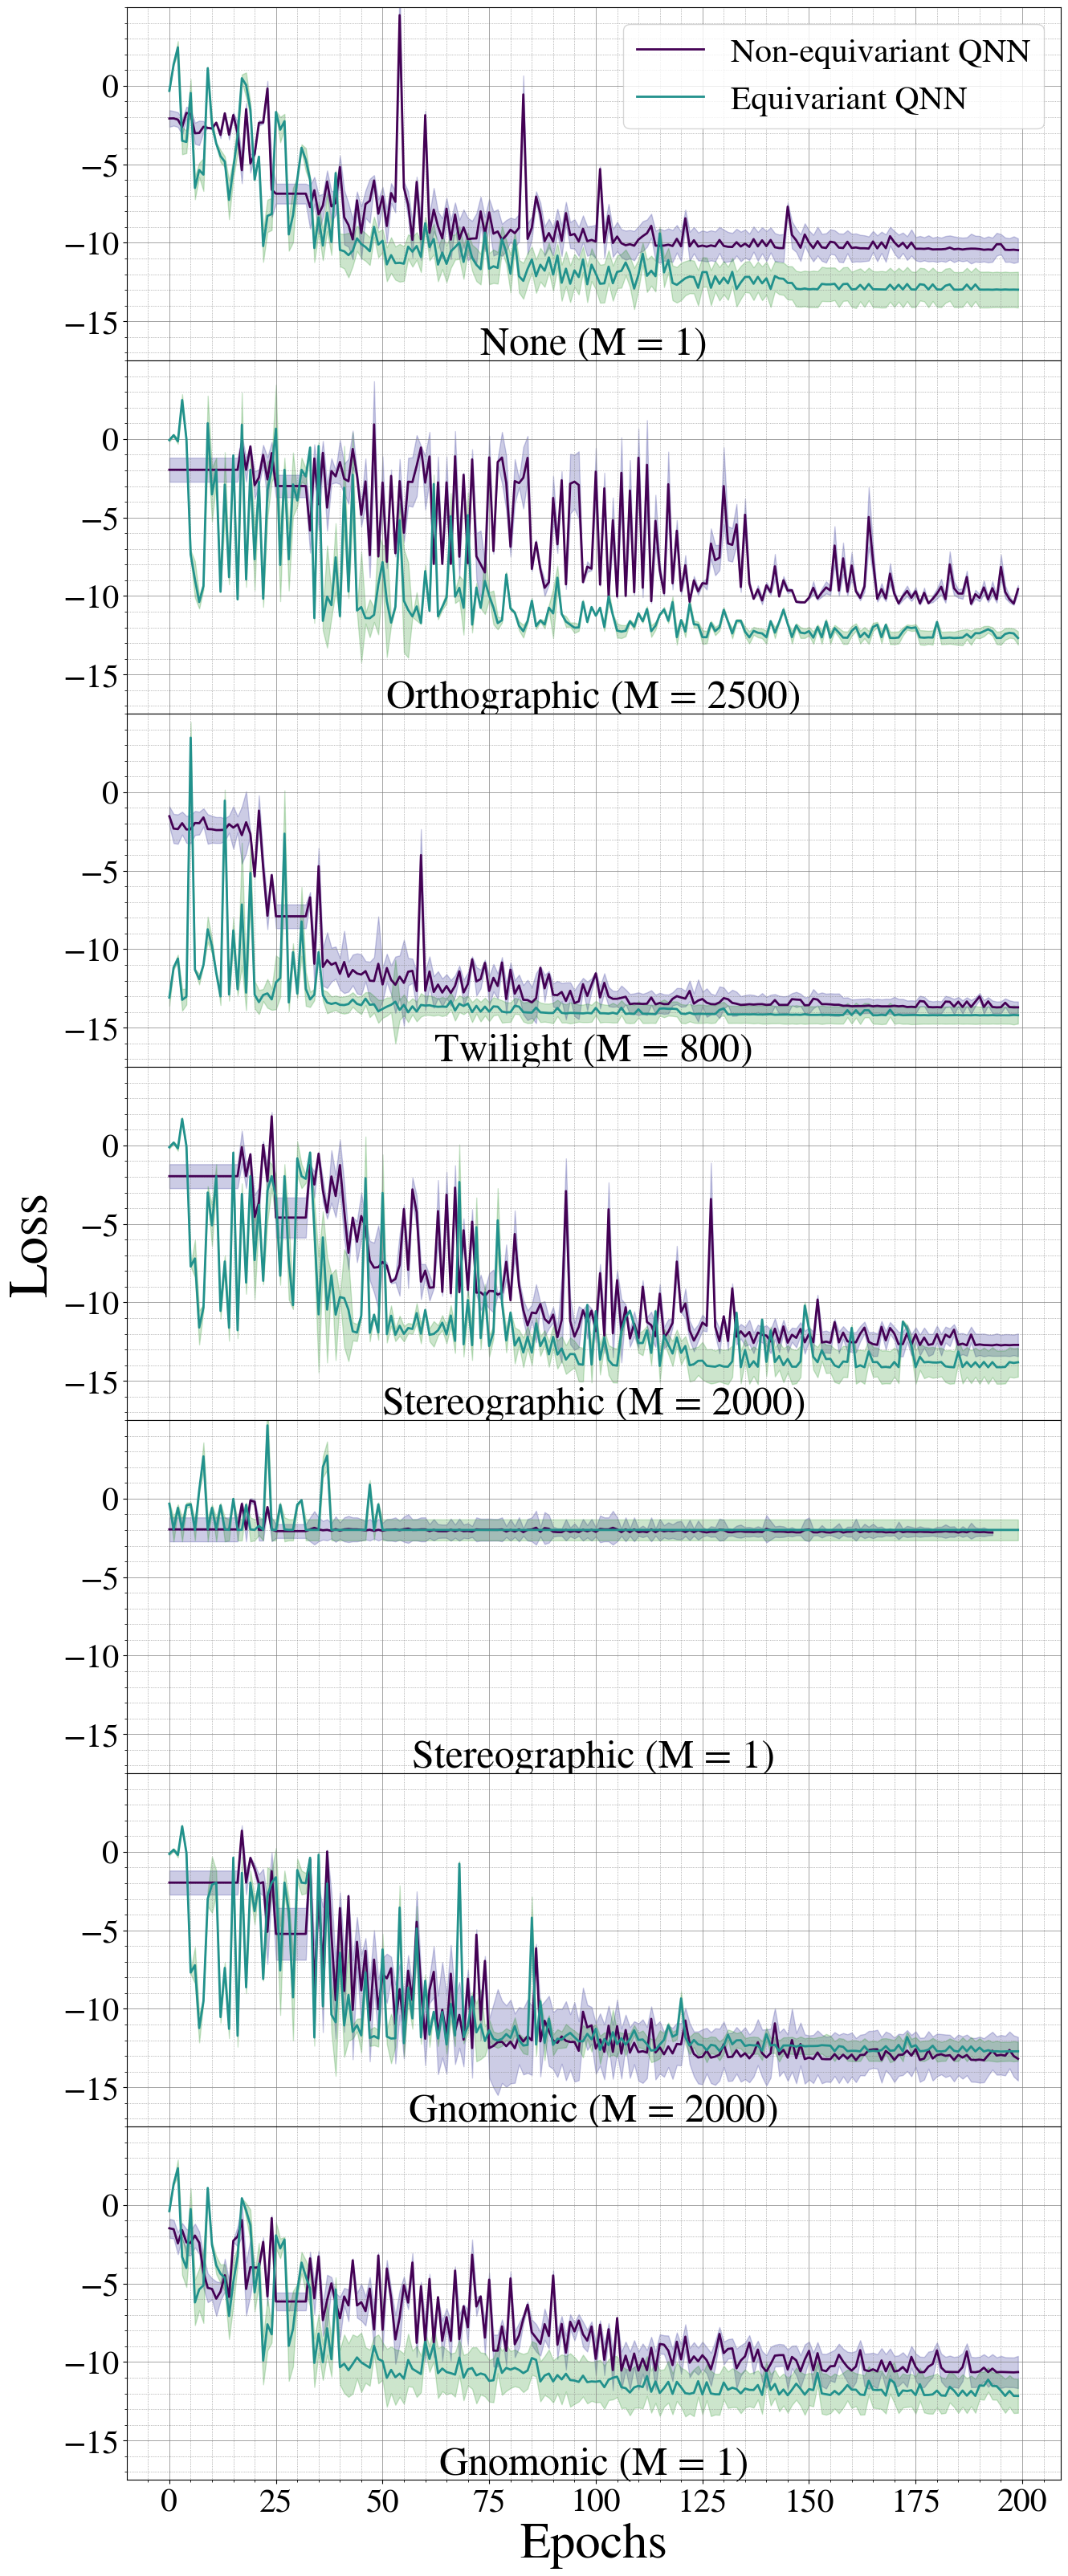

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

n = 3  # Number of colors
colour = cm.viridis(np.linspace(0, 1, n))

# Create a figure with 4 subplots arranged in a 2x2 grid
fig, axs = plt.subplots(7, 1, figsize=(15, 40), gridspec_kw={'hspace': 0, 'wspace': 0})

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through each subplot and plot the data
for i, ax in enumerate(axs):
    ax.plot(avg_losses_all[i], linewidth=2, color=colour[0], label='Non-equivariant QNN') # 'navy'
    ax.fill_between(range(len(avg_losses_all[i])), 
                    avg_losses_all[i] - std_losses_all[i], 
                    avg_losses_all[i] + std_losses_all[i], 
                    color='navy', alpha=0.2)
    
    ax.plot(avg_losses_all_eqv[i], linewidth=2, color=colour[1], label='Equivariant QNN') # 'green'
    ax.fill_between(range(len(avg_losses_all_eqv[i])), 
                    avg_losses_all_eqv[i] - std_losses_all_eqv[i], 
                    avg_losses_all_eqv[i] + std_losses_all_eqv[i], 
                    color='green', alpha=0.2)
    
    ax.set_ylim(-17.5, 5)
    
    if i == 3:
        ax.set_ylabel("Loss", fontsize=50)
    if i >= 2:
        ax.set_xlabel("Epochs", fontsize=45)
    
    # if i % 2 == 1:  # Remove y-axis labels for the second column subplots
    #     ax.set_yticklabels([])

    # Remove the '5' tick label from the y-axis
    yticks = ax.get_yticks().tolist()
    if 5 in yticks:
        yticks.remove(5)
    if -20 in yticks:
        yticks.remove(-20)
    
    ax.set_yticks(yticks)
    
    if i == 0:
        ax.legend(loc="upper right")

    # Set the title inside the plot just above the x-axis
    ax.set_title(f"{Mapping[i]} (M = {M[i]})", loc='center', y=0)  # Adjusted y to place title inside the plot

    # Add major and minor grid lines
    ax.grid(which='both', linestyle='-', linewidth='0.5', color='grey')
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# Adjust layout and save the figure
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig(f'Final_loss_plots/loss_{timestr}.pdf', format='pdf', bbox_inches='tight')
plt.show()